In [4]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2

TRAIN_DIR = 'D:/Facial Emotion Detection 02/train'
TEST_DIR = 'D:/Facial Emotion Detection 02/test'


IMG_SIZE = (48, 48) 
BATCH_SIZE = 64
EPOCHS = 50

In [5]:
print("Loading Data using absolute paths...")


train_ds = tf.keras.utils.image_dataset_from_directory(
  TRAIN_DIR,
  labels='inferred',
  label_mode='categorical', 
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE,
  color_mode='grayscale', 
  shuffle=True,
  seed=42
)


test_ds = tf.keras.utils.image_dataset_from_directory(
  TEST_DIR,
  labels='inferred',
  label_mode='categorical',
  image_size=IMG_SIZE,
  batch_size=BATCH_SIZE,
  color_mode='grayscale'
)

class_names = train_ds.class_names
NUM_CLASSES = len(class_names)

print("\nIdentified Emotion Classes:", class_names)
print(f"Total number of classes: {NUM_CLASSES}")


def normalize_img(image, label):
  image = tf.cast(image, tf.float32) / 255.0
  return image, label

train_ds = train_ds.map(normalize_img)
test_ds = test_ds.map(normalize_img)

Loading Data using absolute paths...
Found 30154 files belonging to 7 classes.
Found 7264 files belonging to 7 classes.

Identified Emotion Classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Total number of classes: 7


In [6]:

model = Sequential([
    # Block 1
    Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=IMG_SIZE + (1,)),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 2
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Block 3
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Classifier Layers
    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(NUM_CLASSES, activation='softmax') 
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\nModel Summary:")
model.summary()


Model Summary:


C:\Users\VERNA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 48, 48, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 48, 48, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 24, 24, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 24, 24, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 5,872,583 (22.40 MB)

 Trainable params: 5,869,767 (22.39 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os


ROOT_DIR = 'D:/Facial Emotion Detection 02' 
TRAIN_ROOT_DIR = os.path.join(ROOT_DIR, 'multitask_data', 'train')
TEST_ROOT_DIR = os.path.join(ROOT_DIR, 'multitask_data', 'test') 


IMG_SIZE = (48, 48)
BATCH_SIZE = 32


ETHNICITY_CLASSES = ['Non_South_Asian', 'South_Asian'] 
EMOTION_CLASSES = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'] 

NUM_EMOTIONS = len(EMOTION_CLASSES)
NUM_ETHNICITIES = len(ETHNICITY_CLASSES)

print(f"Number of Emotion Classes: {NUM_EMOTIONS}")
print(f"Number of Ethnicity Classes: {NUM_ETHNICITIES}")

Number of Emotion Classes: 7
Number of Ethnicity Classes: 2


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import time 


ROOT_DIR = 'D:/Facial Emotion Detection 02' 
TRAIN_ROOT_DIR = os.path.join(ROOT_DIR, 'multitask_data', 'train')
TEST_ROOT_DIR = os.path.join(ROOT_DIR, 'multitask_data', 'test') 


IMG_SIZE = (48, 48)

ETHNICITY_CLASSES = ['Non_South_Asian', 'South_Asian'] 
EMOTION_CLASSES = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'] 

NUM_EMOTIONS = len(EMOTION_CLASSES)
NUM_ETHNICITIES = len(ETHNICITY_CLASSES)

print(f"Emotion Classes: {EMOTION_CLASSES}")
print(f"Ethnicity Classes: {ETHNICITY_CLASSES}")




def load_multitask_data(root_dir, ethnicity_classes, emotion_classes):
    
    all_image_paths = []
    ethnicity_labels = []
    emotion_labels = []
    
    print(f"Collecting image paths from: {root_dir}")


    for eth_idx, ethnicity in enumerate(ethnicity_classes):
        ethnicity_path = os.path.join(root_dir, ethnicity)
        
   
        for emo_idx, emotion in enumerate(emotion_classes):
            emotion_path = os.path.join(ethnicity_path, emotion)
           
            for dirpath, dirnames, filenames in os.walk(emotion_path):
                for filename in filenames:
                    
                    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
                        all_image_paths.append(os.path.join(dirpath, filename))
                        
                        ethnicity_labels.append(eth_idx) 
                        emotion_labels.append(emo_idx) 
                        
    print(f"Total images found: {len(all_image_paths)}")

   
    path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
 
    def load_and_preprocess_image(path):
      
        path = tf.strings.as_string(path) 
        
        img = tf.io.read_file(path)
        img = tf.image.decode_image(img, channels=1, expand_animations=False) 
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = tf.image.resize(img, IMG_SIZE)
        return img

    image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

   
    ethnicity_ds = tf.data.Dataset.from_tensor_slices(ethnicity_labels)
    ethnicity_ds = ethnicity_ds.map(lambda x: tf.one_hot(x, NUM_ETHNICITIES))
    
    emotion_ds = tf.data.Dataset.from_tensor_slices(emotion_labels)
    emotion_ds = emotion_ds.map(lambda x: tf.one_hot(x, NUM_EMOTIONS))

   
    multitask_ds = tf.data.Dataset.zip((image_ds, (emotion_ds, ethnicity_ds)))
    
    
    ds = multitask_ds.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    
    return ds


train_ds = load_multitask_data(TRAIN_ROOT_DIR, ETHNICITY_CLASSES, EMOTION_CLASSES)
test_ds = load_multitask_data(TEST_ROOT_DIR, ETHNICITY_CLASSES, EMOTION_CLASSES)





# Shared CNN Base (Feature Extractor)
input_tensor = Input(shape=IMG_SIZE + (1,), name='input_image')

# CNN Blocks
x = Conv2D(64, (3, 3), padding='same', activation='relu')(input_tensor)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
shared_features = Dense(512, activation='relu')(x)
shared_features = BatchNormalization()(shared_features)
shared_features = Dropout(0.5)(shared_features)


# Head 1: Emotion Prediction
emotion_head = Dense(256, activation='relu')(shared_features)
emotion_output = Dense(NUM_EMOTIONS, activation='softmax', name='emotion_output')(emotion_head)


# Head 2: Ethnicity Prediction
ethnicity_head = Dense(256, activation='relu')(shared_features)
ethnicity_output = Dense(NUM_ETHNICITIES, activation='softmax', name='ethnicity_output')(ethnicity_head)


# Create the final Model
multitask_model = Model(inputs=input_tensor, outputs=[emotion_output, ethnicity_output])

# Compile the model
multitask_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss={'emotion_output': 'categorical_crossentropy', 
          'ethnicity_output': 'categorical_crossentropy'},
    metrics={'emotion_output': 'accuracy', 
             'ethnicity_output': 'accuracy'}
)

print("\nMulti-Task Model Summary:")
multitask_model.summary()


print("\n--- Starting Multi-Task Model Training ---")

start_time = time.time()

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    restore_best_weights=True
)

history = multitask_model.fit(
    train_ds,
    epochs=50, 
    validation_data=test_ds, 
    callbacks=[early_stopping]
)

end_time = time.time()
print(f"\nTraining complete in {end_time - start_time:.2f} seconds.")

# --- সেভ করা ---
multitask_model.save('multitask_emotion_ethnicity_model.h5')
print("The trained model has been saved.")

-
plt.figure(figsize=(12, 5))

# Plot Emotion Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['emotion_output_accuracy'], label='Emotion Train Acc')
plt.plot(history.history['val_emotion_output_accuracy'], label='Emotion Val Acc')
plt.title('Emotion Prediction Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Ethnicity Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['ethnicity_output_accuracy'], label='Ethnicity Train Acc')
plt.plot(history.history['val_ethnicity_output_accuracy'], label='Ethnicity Val Acc')
plt.title('Ethnicity Prediction Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Emotion Classes: ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
Ethnicity Classes: ['Non_South_Asian', 'South_Asian']
Total images found: 31599
Total images found: 0


TypeError: in user code:

    File "C:\Users\VERNA\AppData\Local\Temp\ipykernel_8576\2418863293.py", line 79, in None  *
        lambda x: tf.one_hot(x, NUM_ETHNICITIES)

    TypeError: Value passed to parameter 'indices' has DataType float32 not in list of allowed values: uint8, int8, int32, int64


Emotion Classes: ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
Ethnicity Classes: ['Non_South_Asian', 'South_Asian']
Total images found: 31475
Total images found: 7430

Multi-Task Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)      │ (None, 48, 48, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 48, 48, 64)        │             640 │ input_image[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 48, 48, 64)        │             256 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 24, 24, 64)        │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 24, 24, 64)        │               0 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 24, 24, 128)       │          73,856 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 24, 24, 128)       │             512 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 12, 12, 128)       │               0 │ batch_normalization_1[0][… │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 12, 12, 128)       │               0 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 18432)             │               0 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 512)               │       9,437,696 │ flatten[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 512)               │           2,048 │ dense[0][0]                │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 512)               │               0 │ batch_normalization_2[0][… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 256)               │         131,328 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 256)               │         131,328 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 9,779,977 (37.31 MB)

 Trainable params: 9,778,569 (37.30 MB)

 Non-trainable params: 1,408 (5.50 KB)


--- Starting Multi-Task Model Training ---
Epoch 1/50
984/984 ━━━━━━━━━━━━━━━━━━━━ 344s 343ms/step - emotion_output_accuracy: 0.7912 - emotion_output_loss: 0.7963 - ethnicity_output_accuracy: 0.9798 - ethnicity_output_loss: 0.0621 - loss: 0.8581 - val_emotion_output_accuracy: 0.1324 - val_emotion_output_loss: 4.0425 - val_ethnicity_output_accuracy: 0.4884 - val_ethnicity_output_loss: 1.4533 - val_loss: 5.5077
Epoch 2/50
984/984 ━━━━━━━━━━━━━━━━━━━━ 332s 332ms/step - emotion_output_accuracy: 0.7912 - emotion_output_loss: 0.7634 - ethnicity_output_accuracy: 0.9820 - ethnicity_output_loss: 0.0654 - loss: 0.8285 - val_emotion_output_accuracy: 0.1192 - val_emotion_output_loss: 4.2294 - val_ethnicity_output_accuracy: 0.6908 - val_ethnicity_output_loss: 0.8540 - val_loss: 5.0903
Epoch 3/50
984/984 ━━━━━━━━━━━━━━━━━━━━ 298s 299ms/step - emotion_output_accuracy: 0.7925 - emotion_output_loss: 0.7478 - ethnicity_output_accuracy: 0.9832 - ethnicity_output_loss: 0.0642 - loss: 0.8115 - val_emotion


Training complete in 3941.99 seconds.
The trained model has been saved.


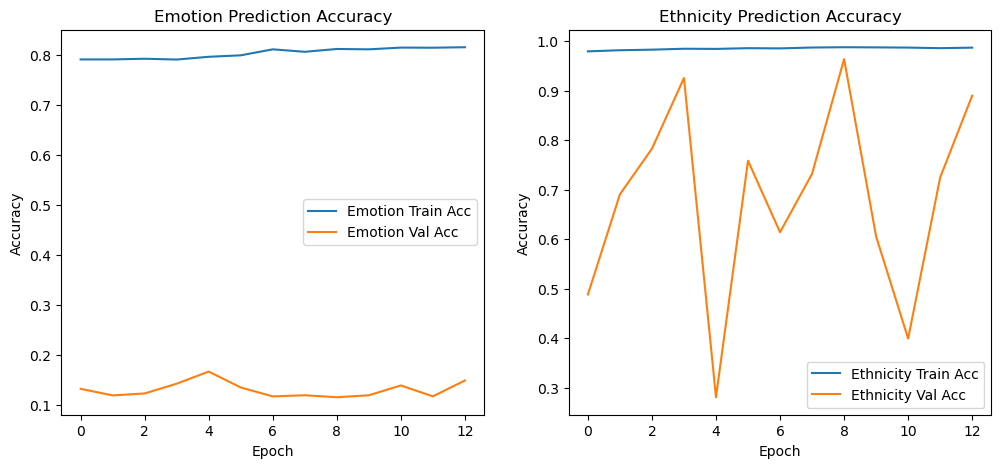

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import time

# --- 1. Set Absolute Paths and Parameters ---
# Ensure this path is correct for your 'multitask_data' folder
ROOT_DIR = 'D:/Facial Emotion Detection 02' 
TRAIN_ROOT_DIR = os.path.join(ROOT_DIR, 'multitask_data', 'train')
TEST_ROOT_DIR = os.path.join(ROOT_DIR, 'multitask_data', 'test') 

# Data Parameters
IMG_SIZE = (48, 48)
BATCH_SIZE = 32
EPOCHS = 50 # Maximum epochs to run

# Classes are derived from your folder structure
ETHNICITY_CLASSES = ['Non_South_Asian', 'South_Asian'] 
EMOTION_CLASSES = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'] 

NUM_EMOTIONS = len(EMOTION_CLASSES)
NUM_ETHNICITIES = len(ETHNICITY_CLASSES)

print(f"Emotion Classes: {EMOTION_CLASSES}")
print(f"Ethnicity Classes: {ETHNICITY_CLASSES}")


# --- 2. Custom Multi-Task Data Loader Function ---

def load_multitask_data(root_dir, ethnicity_classes, emotion_classes):
    
    all_image_paths = []
    ethnicity_labels = []
    emotion_labels = []
    
    print(f"Collecting image paths from: {root_dir}")

    # Traverse Ethnicity (Level 1)
    for eth_idx, ethnicity in enumerate(ethnicity_classes):
        ethnicity_path = os.path.join(root_dir, ethnicity)
        
        # Traverse Emotion (Level 2)
        for emo_idx, emotion in enumerate(emotion_classes):
            emotion_path = os.path.join(ethnicity_path, emotion)
            
            # Use os.walk to find all images inside the Emotion folder 
            # (which includes Fake/Genuine subfolders, correctly ignoring them as separate classes)
            for dirpath, dirnames, filenames in os.walk(emotion_path):
                for filename in filenames:
                    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
                        all_image_paths.append(os.path.join(dirpath, filename))
                        
                        ethnicity_labels.append(eth_idx) 
                        emotion_labels.append(emo_idx) 
                        
    print(f"Total images found: {len(all_image_paths)}")
    if len(all_image_paths) == 0:
        raise FileNotFoundError(f"No images found in {root_dir}. Please check your folder structure.")


    # 1. Create a Dataset of image paths
    path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
    
    # 2. Image Loading and Preprocessing Function
    def load_and_preprocess_image(path):
        # Convert path to string tensor (safety measure)
        path = tf.strings.as_string(path) 
        
        img = tf.io.read_file(path)
        img = tf.image.decode_image(img, channels=1, expand_animations=False) # Grayscale (1 channel)
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = tf.image.resize(img, IMG_SIZE)
        return img

    image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

    # 3. Label Datasets (One-Hot Encoding)
    ethnicity_ds = tf.data.Dataset.from_tensor_slices(ethnicity_labels)
    ethnicity_ds = ethnicity_ds.map(lambda x: tf.one_hot(x, NUM_ETHNICITIES))
    
    emotion_ds = tf.data.Dataset.from_tensor_slices(emotion_labels)
    emotion_ds = emotion_ds.map(lambda x: tf.one_hot(x, NUM_EMOTIONS))

    # 4. Zip Images and Both Labels: (Image, (Emotion_Label, Ethnicity_Label))
    multitask_ds = tf.data.Dataset.zip((image_ds, (emotion_ds, ethnicity_ds)))
    
    # 5. Shuffling, Batching, and Prefetching
    ds = multitask_ds.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    
    return ds

# --- 3. Load the Datasets ---
train_ds = load_multitask_data(TRAIN_ROOT_DIR, ETHNICITY_CLASSES, EMOTION_CLASSES)
test_ds = load_multitask_data(TEST_ROOT_DIR, ETHNICITY_CLASSES, EMOTION_CLASSES)


# --- 4. Multi-Task Model Architecture ---


# Shared CNN Base (Feature Extractor)
input_tensor = Input(shape=IMG_SIZE + (1,), name='input_image')

# CNN Blocks
x = Conv2D(64, (3, 3), padding='same', activation='relu')(input_tensor)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
shared_features = Dense(512, activation='relu')(x)
shared_features = BatchNormalization()(shared_features)
shared_features = Dropout(0.5)(shared_features)


# Head 1: Emotion Prediction
emotion_head = Dense(256, activation='relu')(shared_features)
emotion_output = Dense(NUM_EMOTIONS, activation='softmax', name='emotion_output')(emotion_head)


# Head 2: Ethnicity Prediction
ethnicity_head = Dense(256, activation='relu')(shared_features)
ethnicity_output = Dense(NUM_ETHNICITIES, activation='softmax', name='ethnicity_output')(ethnicity_head)


# Create the final Model
multitask_model = Model(inputs=input_tensor, outputs=[emotion_output, ethnicity_output])

# Compile the model
multitask_model.compile(
    optimizer=Adam(learning_rate=0.0001),
    # Assign specific loss functions to the named outputs
    loss={'emotion_output': 'categorical_crossentropy', 
          'ethnicity_output': 'categorical_crossentropy'},
    # Assign specific metrics to the named outputs
    metrics={'emotion_output': 'accuracy', 
             'ethnicity_output': 'accuracy'}
)

print("\nMulti-Task Model Summary:")
multitask_model.summary()


# --- 5. Model Training and Saving ---
print("\n--- Starting Multi-Task Model Training ---")

start_time = time.time()

# Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', # Monitors the total validation loss
    patience=10, 
    restore_best_weights=True
)

history = multitask_model.fit(
    train_ds,
    epochs=EPOCHS, 
    validation_data=test_ds, 
    callbacks=[early_stopping]
)

end_time = time.time()
print(f"\nTraining complete in {end_time - start_time:.2f} seconds.")

# --- Save the Model ---
multitask_model.save('multitask_emotion_ethnicity_model.h5')
print("The trained model has been saved.")

# --- Plotting Results ---
plt.figure(figsize=(12, 5))

# Plot Emotion Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['emotion_output_accuracy'], label='Emotion Train Acc')
plt.plot(history.history['val_emotion_output_accuracy'], label='Emotion Val Acc')
plt.title('Emotion Prediction Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Ethnicity Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['ethnicity_output_accuracy'], label='Ethnicity Train Acc')
plt.plot(history.history['val_ethnicity_output_accuracy'], label='Ethnicity Val Acc')
plt.title('Ethnicity Prediction Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

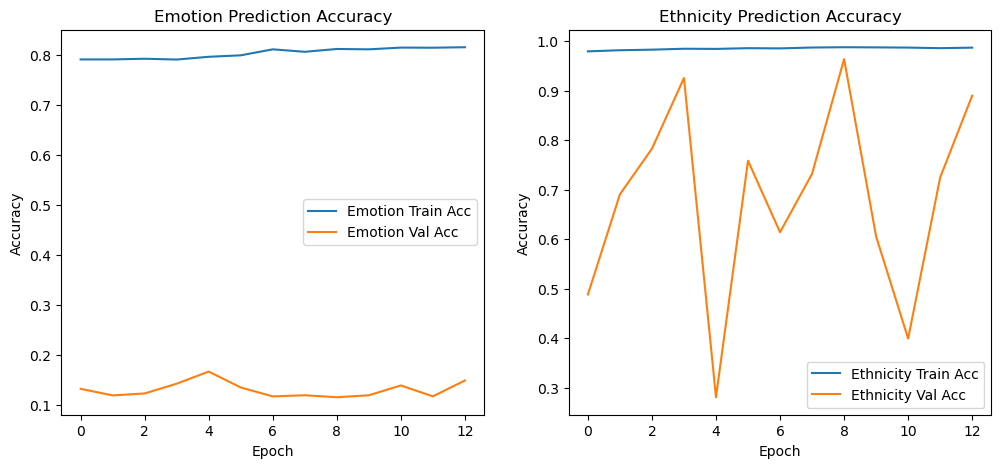

In [6]:
plt.figure(figsize=(12, 5))

# Plot Emotion Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['emotion_output_accuracy'], label='Emotion Train Acc')
plt.plot(history.history['val_emotion_output_accuracy'], label='Emotion Val Acc')
plt.title('Emotion Prediction Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Ethnicity Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['ethnicity_output_accuracy'], label='Ethnicity Train Acc')
plt.plot(history.history['val_ethnicity_output_accuracy'], label='Ethnicity Val Acc')
plt.title('Ethnicity Prediction Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

MODEL_PATH = 'multitask_emotion_ethnicity_model.h5' 
IMG_SIZE = (48, 48)


ETHNICITY_CLASSES = ['Non_South_Asian', 'South_Asian'] 
EMOTION_CLASSES = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'] 


try:
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
except Exception as e:
    print(f"Error loading cascade classifier: {e}")
    face_cascade = None


try:
    model = load_model(MODEL_PATH)
    print("Multi-Task Model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    exit()


def live_predict():

    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open webcam.")
        return

    while True:
    
        ret, frame = cap.read()
        if not ret:
            break

      
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        
        faces = face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30),
            flags=cv2.CASCADE_SCALE_IMAGE
        )

        for (x, y, w, h) in faces:
       
            face_crop = gray[y:y + h, x:x + w]
            
     
            face_resize = cv2.resize(face_crop, IMG_SIZE, interpolation=cv2.INTER_AREA)
            
      
            # Normalize to [0, 1] and reshape to (1, 48, 48, 1)
            processed_face = face_resize.astype('float32') / 255.0
            processed_face = np.expand_dims(processed_face, axis=0)
            processed_face = np.expand_dims(processed_face, axis=-1)

            predictions = model.predict(processed_face, verbose=0)
            emotion_pred = predictions[0][0]
            ethnicity_pred = predictions[1][0]

       
            emotion_label = EMOTION_CLASSES[np.argmax(emotion_pred)]
            ethnicity_label = ETHNICITY_CLASSES[np.argmax(ethnicity_pred)]
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            

            emotion_text = f"Emotion: {emotion_label}"
            ethnicity_text = f"Ethnicity: {ethnicity_label}"

        
            cv2.putText(frame, emotion_text, (x, y - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)
          
            cv2.putText(frame, ethnicity_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2, cv2.LINE_AA)

      
        cv2.imshow('Multi-Task Emotion and Ethnicity Predictor', frame)

        # 'q' প্রেস করলে লুপ ব্রেক হবে  if cv2.waitKey(1) & 0xFF == ord('q'):
            break


    cap.release()
    cv2.destroyAllWindows()
    print("Webcam closed.")


live_predict()

Emotion Classes: ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
Ethnicity Classes: ['Non_South_Asian', 'South_Asian']
Total images found: 31475
Total images found: 7430

Multi-Task Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)      │ (None, 48, 48, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 48, 48, 64)        │             640 │ input_image[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 48, 48, 64)        │             256 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 24, 24, 64)        │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 24, 24, 64)        │               0 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 24, 24, 128)       │          73,856 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 24, 24, 128)       │             512 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 12, 12, 128)       │               0 │ batch_normalization_1[0][… │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 12, 12, 128)       │               0 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 12, 12, 256)       │         295,168 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 12, 12, 256)       │           1,024 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 6, 6, 256)         │               0 │ batch_normalization_2[0][… │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 6, 6, 256)         │               0 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 9216)              │               0 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 512)               │       4,719,10

 Total params: 5,357,577 (20.44 MB)

 Trainable params: 5,355,657 (20.43 MB)

 Non-trainable params: 1,920 (7.50 KB)


--- Starting Multi-Task Model Training ---
Epoch 1/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 342s 479ms/step - emotion_output_accuracy: 0.2986 - emotion_output_loss: 1.8598 - ethnicity_output_accuracy: 0.9475 - ethnicity_output_loss: 0.1303 - loss: 2.9204 - val_emotion_output_accuracy: 0.2755 - val_emotion_output_loss: 2.1024 - val_ethnicity_output_accuracy: 0.9777 - val_ethnicity_output_loss: 0.1810 - val_loss: 3.2528 - learning_rate: 0.0010
Epoch 2/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 343s 475ms/step - emotion_output_accuracy: 0.4235 - emotion_output_loss: 1.4954 - ethnicity_output_accuracy: 0.9568 - ethnicity_output_loss: 0.0786 - loss: 2.3218 - val_emotion_output_accuracy: 0.4759 - val_emotion_output_loss: 1.3508 - val_ethnicity_output_accuracy: 0.9783 - val_ethnicity_output_loss: 0.0481 - val_loss: 2.0614 - learning_rate: 0.0010
Epoch 3/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 350s 482ms/step - emotion_output_accuracy: 0.4708 - emotion_output_loss: 1.3717 - ethnicity_output_accuracy: 0.9574 - ethnici


Training complete in 12711.03 seconds.
The improved model has been saved.


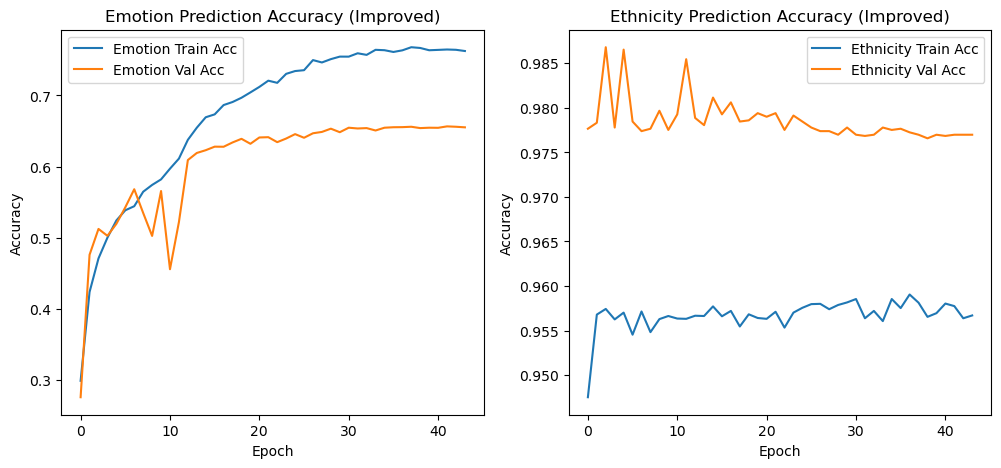

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import time


ROOT_DIR = 'D:/Facial Emotion Detection 02' 
TRAIN_ROOT_DIR = os.path.join(ROOT_DIR, 'multitask_data', 'train')
TEST_ROOT_DIR = os.path.join(ROOT_DIR, 'multitask_data', 'test') 

IMG_SIZE = (48, 48)
BATCH_SIZE = 64
EPOCHS = 100 

ETHNICITY_CLASSES = ['Non_South_Asian', 'South_Asian'] 
EMOTION_CLASSES = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'] 
NUM_EMOTIONS = len(EMOTION_CLASSES)
NUM_ETHNICITIES = len(ETHNICITY_CLASSES)

print(f"Emotion Classes: {EMOTION_CLASSES}")
print(f"Ethnicity Classes: {ETHNICITY_CLASSES}")



def load_multitask_data(root_dir, ethnicity_classes, emotion_classes):
    
    all_image_paths = []
    ethnicity_labels = []
    emotion_labels = []
    
    print(f"Collecting image paths from: {root_dir}")

    for eth_idx, ethnicity in enumerate(ethnicity_classes):
        ethnicity_path = os.path.join(root_dir, ethnicity)
        for emo_idx, emotion in enumerate(emotion_classes):
            emotion_path = os.path.join(ethnicity_path, emotion)
            for dirpath, dirnames, filenames in os.walk(emotion_path):
                for filename in filenames:
                    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
                        all_image_paths.append(os.path.join(dirpath, filename))
                        ethnicity_labels.append(eth_idx) 
                        emotion_labels.append(emo_idx) 
                        
    print(f"Total images found: {len(all_image_paths)}")
    if len(all_image_paths) == 0:
        print("WARNING: No images found. Check folder path and contents.")

    path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
    
    def load_and_preprocess_image(path):
        path = tf.strings.as_string(path) 
        img = tf.io.read_file(path)
        img = tf.image.decode_image(img, channels=1, expand_animations=False)
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = tf.image.resize(img, IMG_SIZE)
        return img

    image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

    ethnicity_ds = tf.data.Dataset.from_tensor_slices(ethnicity_labels)
    ethnicity_ds = ethnicity_ds.map(lambda x: tf.one_hot(x, NUM_ETHNICITIES))
    
    emotion_ds = tf.data.Dataset.from_tensor_slices(emotion_labels)
    emotion_ds = emotion_ds.map(lambda x: tf.one_hot(x, NUM_EMOTIONS))

    # আউটপুট স্ট্রাকচার: (Image, (Emotion_Label, Ethnicity_Label))
    multitask_ds = tf.data.Dataset.zip((image_ds, (emotion_ds, ethnicity_ds)))
    
    return multitask_ds, len(all_image_paths)

# --- ৩. ডেটাসেট লোড করা ---
train_ds_raw, train_size = load_multitask_data(TRAIN_ROOT_DIR, ETHNICITY_CLASSES, EMOTION_CLASSES)
test_ds_raw, test_size = load_multitask_data(TEST_ROOT_DIR, ETHNICITY_CLASSES, EMOTION_CLASSES)



def augment_data(image, labels):
    # labels টুপলকে আনপ্যাক করা
    emotion_label, ethnicity_label = labels 
    

    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    
    
    return image, (emotion_label, ethnicity_label)


train_ds = train_ds_raw.shuffle(buffer_size=train_size).map(augment_data, num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds_raw.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE) # টেস্ট ডেটাতে অগমেন্টেশন নেই




input_tensor = Input(shape=IMG_SIZE + (1,), name='input_image')

# Block 1 (64 filters)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(input_tensor)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# Block 2 (128 filters)
x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# Block 3 (256 filters)
x = Conv2D(256, (3, 3), padding='same', activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# Feature Vector
x = Flatten()(x)
shared_features = Dense(512, activation='relu')(x)
shared_features = BatchNormalization()(shared_features)
shared_features = Dropout(0.5)(shared_features)


# Head 1: Emotion Prediction
emotion_head = Dense(256, activation='relu')(shared_features)
emotion_output = Dense(NUM_EMOTIONS, activation='softmax', name='emotion_output')(emotion_head)

# Head 2: Ethnicity Prediction
ethnicity_head = Dense(256, activation='relu')(shared_features)
ethnicity_output = Dense(NUM_ETHNICITIES, activation='softmax', name='ethnicity_output')(ethnicity_head)


# Create the final Model
multitask_model = Model(inputs=input_tensor, outputs=[emotion_output, ethnicity_output])

# Compile the model
multitask_model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss={'emotion_output': 'categorical_crossentropy', 
          'ethnicity_output': 'categorical_crossentropy'},
    # Emotion টাস্ককে বেশি গুরুত্ব দেওয়া হলো (1.5x)
    loss_weights={'emotion_output': 1.5, 
                  'ethnicity_output': 1.0},
    metrics={'emotion_output': 'accuracy', 
             'ethnicity_output': 'accuracy'}
)

print("\nMulti-Task Model Summary:")
multitask_model.summary()



print("\n--- Starting Multi-Task Model Training ---")
start_time = time.time()

# Early Stopping Callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=15, 
    restore_best_weights=True
)

# Learning Rate Scheduler Callback
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2, 
    patience=5,  
    min_lr=0.000001
)


history = multitask_model.fit(
    train_ds,
    epochs=EPOCHS, 
    validation_data=test_ds, 
    callbacks=[early_stopping, lr_schedule]
)

end_time = time.time()
print(f"\nTraining complete in {end_time - start_time:.2f} seconds.")

# --- সেভ করা ---
multitask_model.save('multitask_emotion_ethnicity_improved_model.h5')
print("The improved model has been saved.")

# --- ফলাফল প্লট করা ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['emotion_output_accuracy'], label='Emotion Train Acc')
plt.plot(history.history['val_emotion_output_accuracy'], label='Emotion Val Acc')
plt.title('Emotion Prediction Accuracy (Improved)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['ethnicity_output_accuracy'], label='Ethnicity Train Acc')
plt.plot(history.history['val_ethnicity_output_accuracy'], label='Ethnicity Val Acc')
plt.title('Ethnicity Prediction Accuracy (Improved)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

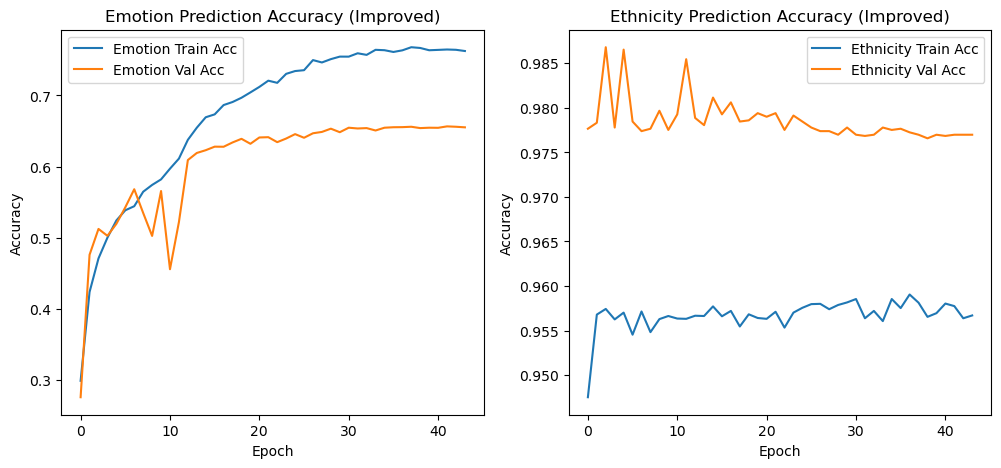

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['emotion_output_accuracy'], label='Emotion Train Acc')
plt.plot(history.history['val_emotion_output_accuracy'], label='Emotion Val Acc')
plt.title('Emotion Prediction Accuracy (Improved)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['ethnicity_output_accuracy'], label='Ethnicity Train Acc')
plt.plot(history.history['val_ethnicity_output_accuracy'], label='Ethnicity Val Acc')
plt.title('Ethnicity Prediction Accuracy (Improved)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model


MODEL_PATH = 'multitask_emotion_ethnicity_improved_model.h5' 
IMG_SIZE = (48, 48)


ETHNICITY_CLASSES = ['Non_South_Asian', 'South_Asian'] 
EMOTION_CLASSES = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'] 


try:
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    if face_cascade.empty():
        print("Error: Face cascade classifier failed to load. Check installation.")
except Exception as e:
    print(f"Error loading cascade classifier: {e}")
    face_cascade = None



try:
  
    model = load_model(MODEL_PATH)
    print(f"Multi-Task Model '{MODEL_PATH}' loaded successfully.")
except Exception as e:
    print(f"Error loading model. Check if the file path is correct: {e}")
   
    model = None
    exit()



def live_predict():
    
  
    if model is None or face_cascade is None:
        print("Cannot start prediction: Model or Cascade classifier is missing.")
        return

    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: Could not open webcam. Check if the camera is in use by another application.")
        return

    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Failed to read frame from webcam.")
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        # ফেস ডিটেকশন
        faces = face_cascade.detectMultiScale(
            gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30), flags=cv2.CASCADE_SCALE_IMAGE
        )

        for (x, y, w, h) in faces:
            
            face_crop = gray[y:y + h, x:x + w]
            face_resize = cv2.resize(face_crop, IMG_SIZE, interpolation=cv2.INTER_AREA)
            
            processed_face = face_resize.astype('float32') / 255.0
            
            
            processed_face = np.expand_dims(processed_face, axis=0)
            processed_face = np.expand_dims(processed_face, axis=-1)

            \
            predictions = model.predict(processed_face, verbose=0) 
            
            emotion_pred_prob = predictions[0][0]
            ethnicity_pred_prob = predictions[1][0]

                  emotion_label = EMOTION_CLASSES[np.argmax(emotion_pred_prob)]
            ethnicity_label = ETHNICITY_CLASSES[np.argmax(ethnicity_pred_prob)]
            
            emotion_conf = emotion_pred_prob[np.argmax(emotion_pred_prob)] * 100
            ethnicity_conf = ethnicity_pred_prob[np.argmax(ethnicity_pred_prob)] * 100
            
          
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            
            emotion_text = f"Emotion: {emotion_label} ({emotion_conf:.1f}%)"
            ethnicity_text = f"Ethnicity: {ethnicity_label} ({ethnicity_conf:.1f}%)"

           
            cv2.putText(frame, emotion_text, (x, y - 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, cv2.LINE_AA)
            cv2.putText(frame, ethnicity_text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2, cv2.LINE_AA)

        cv2.imshow('Multi-Task Emotion and Ethnicity Predictor', frame)

 
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    print("Webcam closed and windows destroyed.")


live_predict()

Multi-Task Model 'multitask_emotion_ethnicity_improved_model.h5' loaded successfully.


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import os


BASE_DIR = 'D:\Facial Emotion Detection 02\test\happy'


MODEL_FILE_NAME = 'multitask_emotion_ethnicity_improved_model.h5' 
MODEL_PATH = os.path.join(BASE_DIR, MODEL_FILE_NAME)


IMAGE_TO_TEST_PATH = os.path.join(BASE_DIR, 'train', 'happy', 'Training_431681.jpg')

IMG_SIZE = (48, 48)


ETHNICITY_CLASSES = ['Non_South_Asian', 'South_Asian'] 
EMOTION_CLASSES = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'] 


try:
    model = load_model(MODEL_PATH)
    print(f"Model '{MODEL_FILE_NAME}' loaded successfully from: {MODEL_PATH}")
except Exception as e:
    print(f"FATAL ERROR: Could not load model. Check path and file name.")
    print(f"Error details: {e}")
    exit()



def test_image_prediction(image_path, model):
    
    #
    try:
        print(f"\n--- Testing Image: {os.path.basename(image_path)} ---")
        
   
        img_bgr = cv2.imread(image_path)
        if img_bgr is None:
            raise FileNotFoundError(f"Error: Image not found or corrupted at {image_path}")
            
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

        # মডেল ইনপুটের জন্য রিসাইজ করা (48x48)
        img_resize = cv2.resize(img_gray, IMG_SIZE, interpolation=cv2.INTER_AREA)
        
        # Normalize to [0, 1]
        processed_img = img_resize.astype('float32') / 255.0
        
        # আকৃতি পরিবর্তন: (1, 48, 48, 1)
        input_tensor = np.expand_dims(processed_img, axis=0)
        input_tensor = np.expand_dims(input_tensor, axis=-1)
        
    except FileNotFoundError as e:
        print(e)
        return
    except Exception as e:
        print(f"An error occurred during image preprocessing: {e}")
        return

    # মাল্টিটাস্ক প্রেডিকশন
    try:
        predictions = model.predict(input_tensor, verbose=0)
        emotion_pred_prob = predictions[0][0]
        ethnicity_pred_prob = predictions[1][0]
        
        # প্রেডিকশন ডিকোড করা
        emotion_index = np.argmax(emotion_pred_prob)
        ethnicity_index = np.argmax(ethnicity_pred_prob)
        
        emotion_label = EMOTION_CLASSES[emotion_index]
        ethnicity_label = ETHNICITY_CLASSES[ethnicity_index]
        
        emotion_confidence = emotion_pred_prob[emotion_index] * 100
        ethnicity_confidence = ethnicity_pred_prob[ethnicity_index] * 100
        
        # --- ফলাফল প্রিন্ট করা ---
        print(f"Predicted Emotion: {emotion_label} ({emotion_confidence:.2f}%)")
        print(f"Predicted Ethnicity: {ethnicity_label} ({ethnicity_confidence:.2f}%)")
        print("--------------------------")
        
     
        text_y = 30
        
        cv2.putText(img_bgr, f"Emotion: {emotion_label}", (10, text_y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv2.LINE_AA)
        text_y += 25
        
        cv2.putText(img_bgr, f"Ethnicity: {ethnicity_label}", (10, text_y), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2, cv2.LINE_AA)
        
        # ছবিটি প্রদর্শন
        cv2.imshow('Prediction Result', img_bgr)
        cv2.waitKey(0) 
        cv2.destroyAllWindows()
        
    except Exception as e:
        print(f"An error occurred during prediction/display: {e}")


test_image_prediction(IMAGE_TO_TEST_PATH, model)

FATAL ERROR: Could not load model. Check path and file name.
Error details: [Errno 22] Unable to synchronously open file (unable to open file: name = 'D:\Facial Emotion Detection 02	est\happy\multitask_emotion_ethnicity_improved_model.h5', errno = 22, error message = 'Invalid argument', flags = 0, o_flags = 0)


NameError: name 'model' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model

from tensorflow.keras.regularizers import l2 
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np
import os
import time


ROOT_DIR = 'D:/Facial Emotion Detection 02' 
TRAIN_ROOT_DIR = os.path.join(ROOT_DIR, 'multitask_data', 'train')
TEST_ROOT_DIR = os.path.join(ROOT_DIR, 'multitask_data', 'test') 

IMG_SIZE = (48, 48)
BATCH_SIZE = 64
EPOCHS = 100 

L2_REG_STRENGTH = 0.0001 

ETHNICITY_CLASSES = ['Non_South_Asian', 'South_Asian'] 
EMOTION_CLASSES = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise'] 
NUM_EMOTIONS = len(EMOTION_CLASSES)
NUM_ETHNICITIES = len(ETHNICITY_CLASSES)

print(f"Emotion Classes: {EMOTION_CLASSES}")
print(f"Ethnicity Classes: {ETHNICITY_CLASSES}")



def load_multitask_data(root_dir, ethnicity_classes, emotion_classes):
    
    all_image_paths = []
    ethnicity_labels = []
    emotion_labels = []
    
    print(f"Collecting image paths from: {root_dir}")

    for eth_idx, ethnicity in enumerate(ethnicity_classes):
        ethnicity_path = os.path.join(root_dir, ethnicity)
        for emo_idx, emotion in enumerate(emotion_classes):
            emotion_path = os.path.join(ethnicity_path, emotion)
            for dirpath, dirnames, filenames in os.walk(emotion_path):
                for filename in filenames:
                    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
                        all_image_paths.append(os.path.join(dirpath, filename))
                        ethnicity_labels.append(eth_idx) 
                        emotion_labels.append(emo_idx) 
                        
    print(f"Total images found: {len(all_image_paths)}")

    path_ds = tf.data.Dataset.from_tensor_slices(all_image_paths)
    
    def load_and_preprocess_image(path):
        path = tf.strings.as_string(path) 
        img = tf.io.read_file(path)
        img = tf.image.decode_image(img, channels=1, expand_animations=False)
        img = tf.image.convert_image_dtype(img, tf.float32)
        img = tf.image.resize(img, IMG_SIZE)
        return img

    image_ds = path_ds.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

    ethnicity_ds = tf.data.Dataset.from_tensor_slices(ethnicity_labels)
    ethnicity_ds = ethnicity_ds.map(lambda x: tf.one_hot(x, NUM_ETHNICITIES))
    
    emotion_ds = tf.data.Dataset.from_tensor_slices(emotion_labels)
    emotion_ds = emotion_ds.map(lambda x: tf.one_hot(x, NUM_EMOTIONS))

    # আউটপুট স্ট্রাকচার: (Image, (Emotion_Label, Ethnicity_Label))
    multitask_ds = tf.data.Dataset.zip((image_ds, (emotion_ds, ethnicity_ds)))
    
    return multitask_ds, len(all_image_paths)


train_ds_raw, train_size = load_multitask_data(TRAIN_ROOT_DIR, ETHNICITY_CLASSES, EMOTION_CLASSES)
test_ds_raw, test_size = load_multitask_data(TEST_ROOT_DIR, ETHNICITY_CLASSES, EMOTION_CLASSES)

def augment_data(image, labels):

    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    return image, (emotion_label, ethnicity_label)

train_ds = train_ds_raw.shuffle(buffer_size=train_size).map(augment_data, num_parallel_calls=tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds_raw.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE) 


input_tensor = Input(shape=IMG_SIZE + (1,), name='input_image')


x = Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(L2_REG_STRENGTH))(input_tensor) 
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.35)(x) 

x = Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(L2_REG_STRENGTH))(x) 
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.35)(x) 


x = Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(L2_REG_STRENGTH))(x) 
x = BatchNormalization()(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.40)(x

# Feature Vector (Dense Layer)
x = Flatten()(x)
shared_features = Dense(512, activation='relu', kernel_regularizer=l2(L2_REG_STRENGTH))(x) # L2 Regularization
shared_features = BatchNormalization()(shared_features)
shared_features = Dropout(0.5)(shared_features) 

# Output Heads
emotion_head = Dense(256, activation='relu')(shared_features)
emotion_output = Dense(NUM_EMOTIONS, activation='softmax', name='emotion_output')(emotion_head)

ethnicity_head = Dense(256, activation='relu')(shared_features)
ethnicity_output = Dense(NUM_ETHNICITIES, activation='softmax', name='ethnicity_output')(ethnicity_head)

multitask_model = Model(inputs=input_tensor, outputs=[emotion_output, ethnicity_output])


# Compile the model
multitask_model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss={'emotion_output': 'categorical_crossentropy', 'ethnicity_output': 'categorical_crossentropy'},
  
    loss_weights={'emotion_output': 1.5, 'ethnicity_output': 1.0},
    metrics={'emotion_output': 'accuracy', 'ethnicity_output': 'accuracy'}
)

print("\nMulti-Task Model Summary:")
multitask_model.summary()


print("\n--- Starting Final Model Training (Overfitting Reduction) ---")
start_time = time.time()

# Callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
lr_schedule = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.000001)

# Training
history = multitask_model.fit(
    train_ds,
    epochs=EPOCHS, 
    validation_data=test_ds, 
    callbacks=[early_stopping, lr_schedule]
)

end_time = time.time()
print(f"\nTraining complete in {end_time - start_time:.2f} seconds.")

MODEL_SAVE_PATH = 'multitask_emotion_ethnicity_stable_final_model.h5'
multitask_model.save(MODEL_SAVE_PATH)
print(f"The final stable model has been saved as: {MODEL_SAVE_PATH}")



plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['emotion_output_accuracy'], label='Emotion Train Acc')
plt.plot(history.history['val_emotion_output_accuracy'], label='Emotion Val Acc')
plt.title('Emotion Prediction Accuracy (Stable)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['ethnicity_output_accuracy'], label='Ethnicity Train Acc')
plt.plot(history.history['val_ethnicity_output_accuracy'], label='Ethnicity Val Acc')
plt.title('Ethnicity Prediction Accuracy (Stable)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


Emotion Classes: ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
Ethnicity Classes: ['Non_South_Asian', 'South_Asian']
Total images found: 31475
Total images found: 7430

Multi-Task Model Summary:


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_image (InputLayer)      │ (None, 48, 48, 1)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 48, 48, 64)        │             640 │ input_image[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization           │ (None, 48, 48, 64)        │             256 │ conv2d[0][0]               │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 24, 24, 64)        │               0 │ batch_normalization[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 24, 24, 64)        │               0 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 24, 24, 128)       │          73,856 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_1         │ (None, 24, 24, 128)       │             512 │ conv2d_1[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 12, 12, 128)       │               0 │ batch_normalization_1[0][… │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 12, 12, 128)       │               0 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 12, 12, 256)       │         295,168 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_2         │ (None, 12, 12, 256)       │           1,024 │ conv2d_2[0][0]             │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 6, 6, 256)         │               0 │ batch_normalization_2[0][… │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 6, 6, 256)         │               0 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten (Flatten)             │ (None, 9216)              │               0 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 512)               │       4,719,10

 Total params: 5,357,577 (20.44 MB)

 Trainable params: 5,355,657 (20.43 MB)

 Non-trainable params: 1,920 (7.50 KB)


--- Starting Final Model Training (Overfitting Reduction) ---
Epoch 1/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 308s 500ms/step - emotion_output_accuracy: 0.3026 - emotion_output_loss: 1.8467 - ethnicity_output_accuracy: 0.9475 - ethnicity_output_loss: 0.1249 - loss: 3.0661 - val_emotion_output_accuracy: 0.2448 - val_emotion_output_loss: 1.9521 - val_ethnicity_output_accuracy: 0.9777 - val_ethnicity_output_loss: 0.1688 - val_loss: 3.2364 - learning_rate: 0.0010
Epoch 2/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 310s 494ms/step - emotion_output_accuracy: 0.4049 - emotion_output_loss: 1.5379 - ethnicity_output_accuracy: 0.9560 - ethnicity_output_loss: 0.0816 - loss: 2.6087 - val_emotion_output_accuracy: 0.4320 - val_emotion_output_loss: 1.4711 - val_ethnicity_output_accuracy: 0.9824 - val_ethnicity_output_loss: 0.0379 - val_loss: 2.4676 - learning_rate: 0.0010
Epoch 3/100
492/492 ━━━━━━━━━━━━━━━━━━━━ 265s 494ms/step - emotion_output_accuracy: 0.4546 - emotion_output_loss: 1.4088 - ethnicity_output_accurac